In [2]:
#Подопригора БИ-3-20-01
#Домашнее задание 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import statsmodels.tsa.seasonal as seas
import statsmodels.tsa.statespace.exponential_smoothing as expn
#Для расчет среднеквадратичной ошибки (RMSE), чтобы проверить точность нашей модели на тестовых данных.

from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Временной ряд')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

       # print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

In [105]:
df1=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz4_1.xlsx")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   квартал  16 non-null     int64  
 1   y        16 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 388.0 bytes


In [106]:
df1.rename(columns = {'квартал':'kv'}, inplace = True )

In [107]:
df1.head(10)

,kv,y
0,1,5.399536
1,2,3.544634
2,3,4.488515
3,4,7.152947
4,5,9.396700
5,6,10.966266
6,7,1.132825
7,8,5.131638
8,9,11.190045
9,10,7.626599


In [108]:
df1['y'].describe()

count    16.000000
mean      6.421030
std       2.864463
min       1.132825
25%       4.511480
50%       5.836289
75%       8.069124
max      11.190045
Name: y, dtype: float64

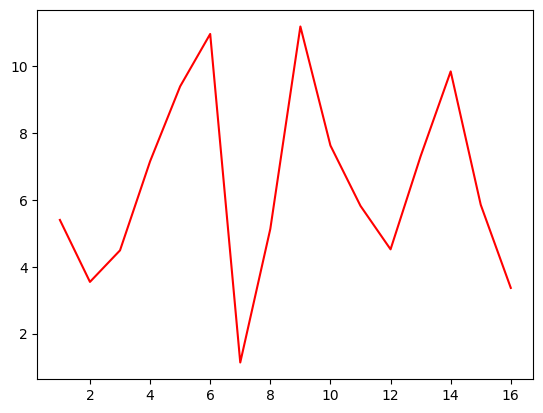

In [109]:
plt.plot(df1.kv,df1.y,color='red')
plt.show()

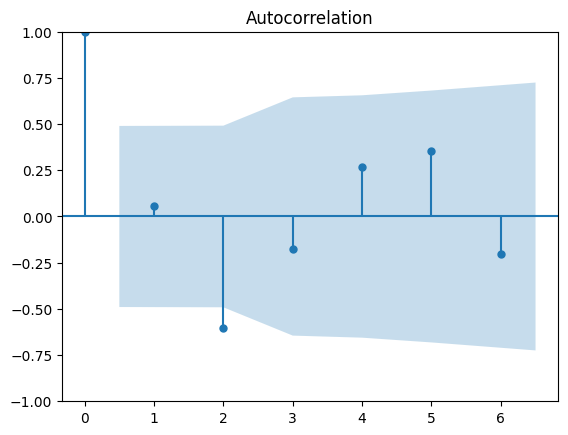

In [110]:
sm.graphics.tsa.plot_acf(df1.y,lags=6,alpha=0.05)
plt.show()

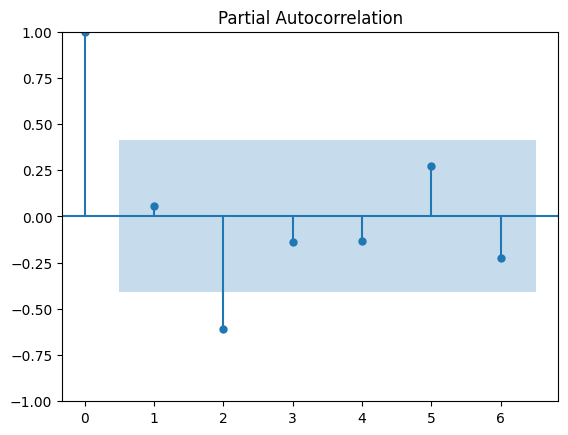

In [111]:
sm.graphics.tsa.plot_pacf(df1.y,lags=6,alpha=0.1);
plt.show()

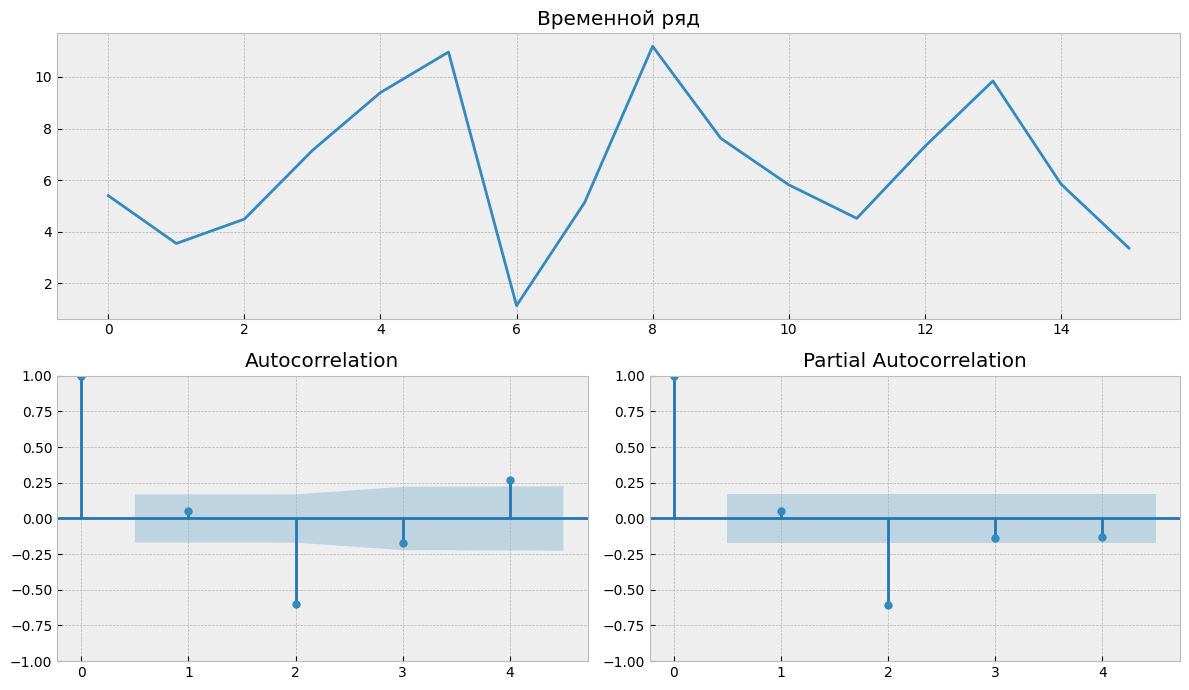

In [112]:
tsplot(df1.y,lags=4)
plt.show()

In [113]:
df1_cl = df1.set_index('kv')


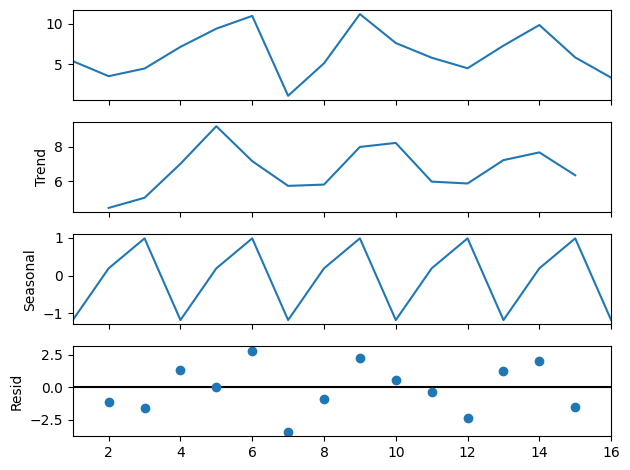

In [114]:
#аддитивная
decomposition = seas.seasonal_decompose(df1_cl, model='additive', period=3)
fig = decomposition.plot()
plt.show()

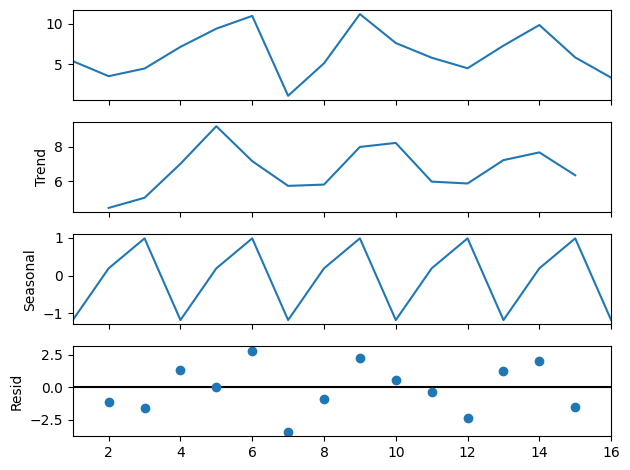

In [115]:
#мультипликативная
decomposition2 = seas.seasonal_decompose(df1_cl, model='multiplicative', period=3)
fig = decomposition.plot()
plt.show()

In [127]:
df1_d = df1.copy()
df1_d['kv'] = pd.date_range(start = 1, periods = 16, freq = 'Q')
df1_d['kv'] = pd.to_datetime(df1_d['kv']). dt.date

In [128]:
df1_d

,kv,y
0,1970-03-31,5.399536
1,1970-06-30,3.544634
2,1970-09-30,4.488515
3,1970-12-31,7.152947
4,1971-03-31,9.396700
5,1971-06-30,10.966266
6,1971-09-30,1.132825
7,1971-12-31,5.131638
8,1972-03-31,11.190045
9,1972-06-30,7.626599


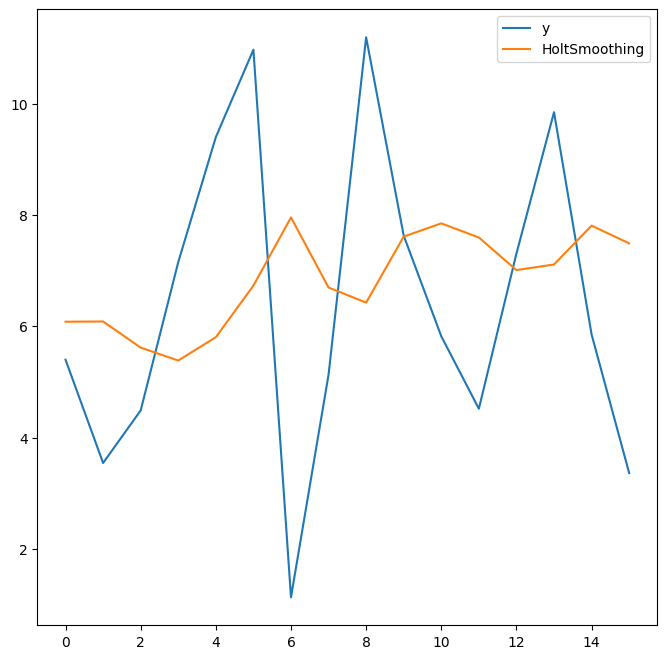

In [135]:
#пыталась решить по другому, но не получилось из-за проблем с форматом даты, решить проблему не получилось. 
#Надеюсь, итоговое решение правильное

from statsmodels.tsa.holtwinters import ExponentialSmoothing,Holt,SimpleExpSmoothing
#Holt Winter's Exponential Smoothing
#ExponentialSmoothing
#Exponential smoothing with trend and seasonal components.
model=ExponentialSmoothing(np.asarray(df1.y),trend="add")
fit=model.fit(smoothing_level=0.2,smoothing_trend=0.2)
df1['SimpleExpSmoothing'] = fit.fittedvalues
plt.figure(figsize=(8,8));
plt.plot(df1.y, label='y');
plt.plot(df1['SimpleExpSmoothing'], label='HoltSmoothing');
plt.legend(loc='best')
plt.show();

In [19]:
#Задача 2
df2=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz4_2.xlsx")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       24 non-null     int64
dtypes: int64(1)
memory usage: 324.0 bytes


In [20]:
#допишем даты, отличие месяц
df2['d'] = pd.date_range(start = 1, periods = 24, freq = 'M')
df2['d'] = pd.to_datetime(df2['d']). dt.date
df2.head()

,y,d
0,22,1970-01-31
1,24,1970-02-28
2,23,1970-03-31
3,14,1970-04-30
4,6,1970-05-31


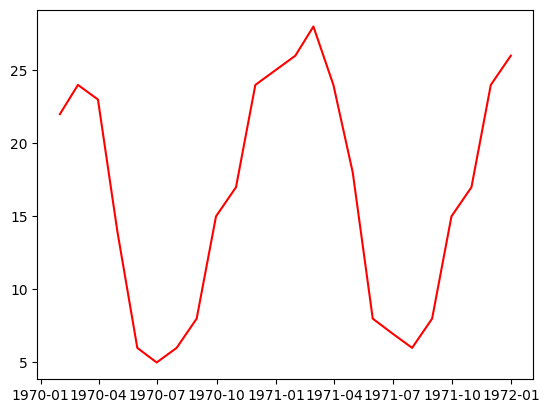

In [21]:
plt.plot(df2.d,df2.y,color='red')
plt.show()

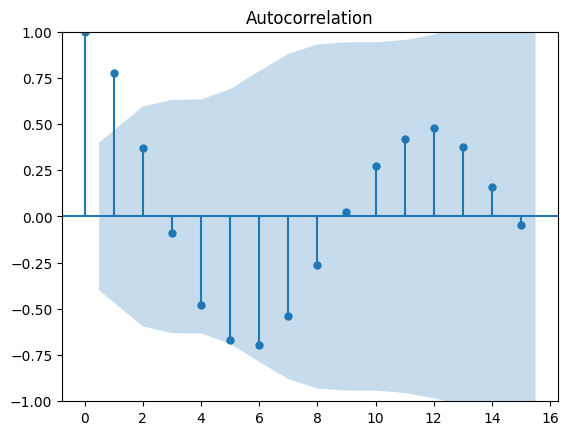

In [30]:
sm.graphics.tsa.plot_acf(df2.y,lags=15,alpha=0.05)
plt.show()
#не полностью сошлось с r

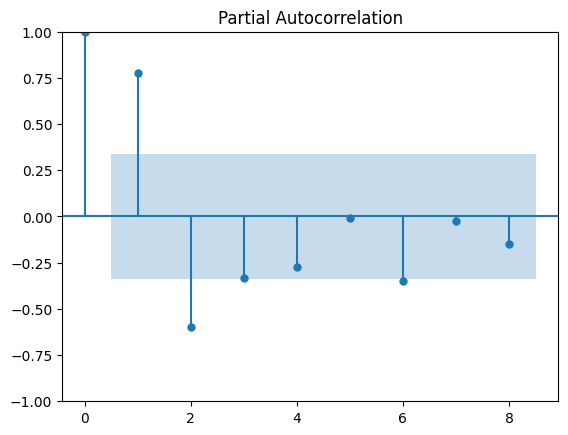

In [31]:
sm.graphics.tsa.plot_pacf(df2.y,lags=8,alpha=0.1);
plt.show()

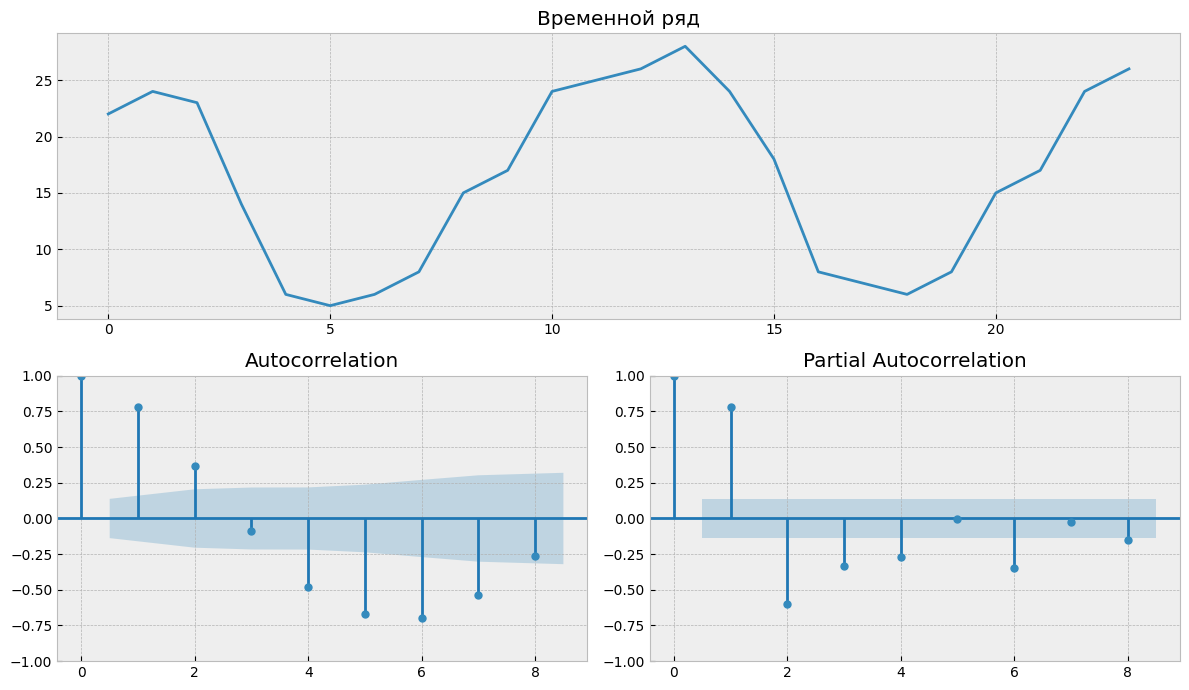

In [18]:
tsplot(df2.y,lags=8)
plt.show()

In [65]:
df2_cl = pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz4_2_c.xlsx")
df2_cl = df2_cl.set_index('n')
df2_cl.head()


,y
n,
1,22
2,24
3,23
4,14
5,6


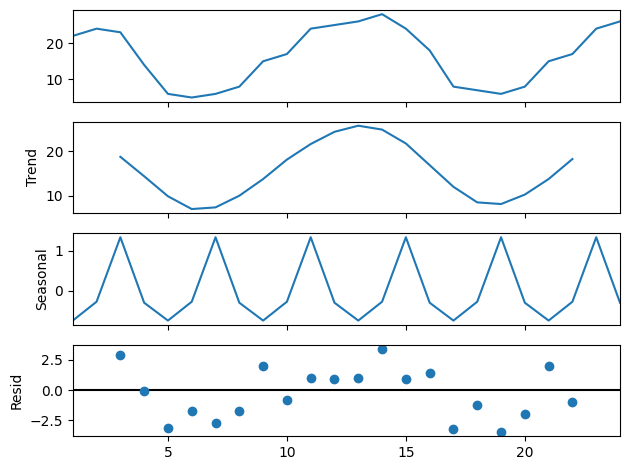

In [68]:
decomposition = seas.seasonal_decompose(df2_cl, model='additive', period=4)
fig = decomposition.plot()
plt.show()

In [77]:
#ряды фурье
from scipy.fft import fft, ifft
furr = scipy.fft.fft(df2_cl, n =2, axis=-1)

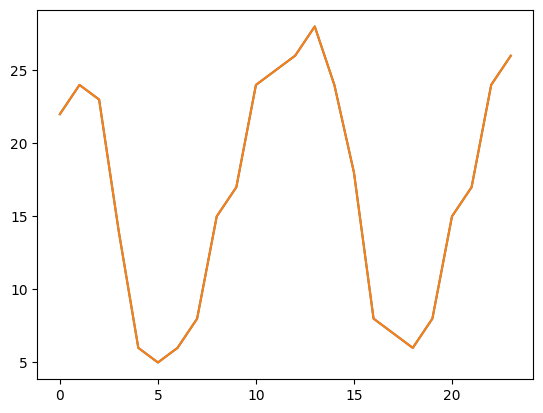

In [78]:
plt.plot(furr) #похоже, что не получилось 

In [83]:
#задание 3
#нашла на форумах интересный способ с отображением выбросов
df3=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/dz4_3.xlsx")
df3.rename(columns = {'t':'x', 'Passenger':'y'}, inplace = True )
df3.head()

,x,y
0,0,1664.81
1,1,2397.53
2,2,2840.71
3,3,3547.29
4,4,3752.96


AttributeError: 'DataFrame' object has no attribute 'outlier'

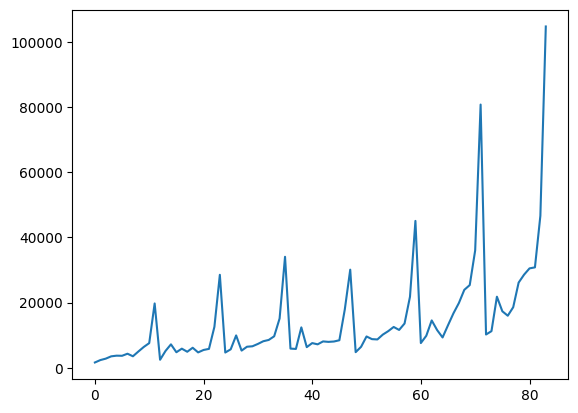

In [85]:
plt.plot(df3.x, df3.y)
plt.scatter(df3[df3.outlier == 1].x, df3[df3.outlier == 1].y, c='r', label='outlier')

In [86]:
def hampel(y, window_size, simg=3):    
    n = len(y)
    new_y = y.copy()
    k = 1.4826
    idx = []

    for i in range((window_size),(n - window_size)):
        r_median = np.median(y[(i - window_size):(i + window_size)]) #скользящая медиана 
        r_mad  = np.median(np.abs(y[(i - window_size):(i + window_size)] - r_median)) #скользящий MAD 
        if (np.abs(y[i] - r_median) > simg * r_mad):
            new_y[i] = r_median #замена выброса
            idx.append(i)
    
    return new_y, idx

In [90]:
new_y, outliers = hampel(df3.y, 5)

In [91]:
df3['new_y'] = new_y
df3.loc[outliers, 'outlier_hampel'] = 1

AttributeError: 'DataFrame' object has no attribute 'outlier'

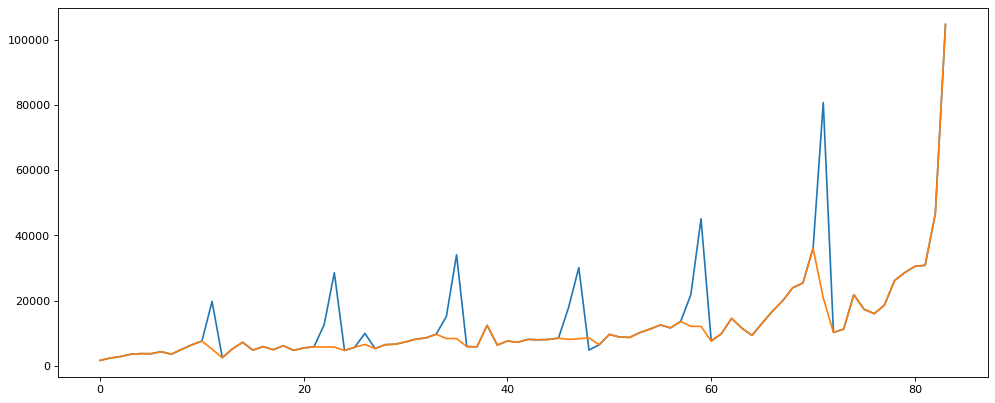

In [92]:
from matplotlib.pyplot import figure
figure(figsize=(15, 6), dpi=80)
plt.plot(df3.x, df3.y)
plt.plot(df3.x, df3.new_y)
plt.scatter(df3[df3.outlier == 1].x, df3[df3.outlier == 1].y, c='r', label='outlier')
plt.scatter(df3[df3.outlier_hampel == 1].x, df3[df3.outlier_hampel == 1].y, c='b', label='outlier')